# EXPLORATORY DATA ANALYSIS

###### AASHISH UPADHYAY

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data.xlsx")

In [148]:
df.shape

(16834, 16)

In [149]:
df.head()

,Date,product,phase,campaign_platform,campaign_type,communication_medium,subchannel,audience_type,creative_type,creative_name,device,age,spends,impressions,clicks,link_clicks
0,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,0.00,2,0,0.0
1,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,25-34,0.00,5,0,0.0
2,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,35-44,0.00,1,0,0.0
3,2019-10-16,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,Undetermined,14.63,5,3,0.0
4,2019-10-18,Product 1,Performance,Google Ads,Search,Search Keywords,Brand,'-,'-,'-,Desktop,18-24,53.31,10,2,0.0


In [5]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16834 entries, 0 to 16833
Data columns (total 16 columns):
Date                    16834 non-null datetime64[ns]
product                 16834 non-null object
phase                   16834 non-null object
campaign_platform       16834 non-null object
campaign_type           16834 non-null object
communication_medium    16834 non-null object
subchannel              16834 non-null object
audience_type           16834 non-null object
creative_type           16834 non-null object
creative_name           16834 non-null object
device                  16834 non-null object
age                     16834 non-null object
spends                  16834 non-null float64
impressions             16834 non-null int64
clicks                  16834 non-null int64
link_clicks             16288 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(2), object(11)
memory usage: 2.1+ MB


In [6]:
df.describe()

,spends,impressions,clicks,link_clicks
count,16834.000000,16834.000000,16834.000000,16288.000000
mean,148.694236,287.959190,11.977783,2.170371
std,483.895724,2444.450313,44.796963,18.659132
min,0.000000,0.000000,0.000000,0.000000
25%,0.180000,3.000000,0.000000,0.000000
50%,22.535000,13.000000,2.000000,0.000000
75%,110.020000,64.000000,8.000000,0.000000
max,9221.960000,67454.000000,1075.000000,450.000000


In [21]:
# columns in dataset 
df.columns

Index(['Date', 'product', 'phase', 'campaign_platform', 'campaign_type',
       'communication_medium', 'subchannel', 'audience_type', 'creative_type',
       'creative_name', 'device', 'age', 'spends', 'impressions', 'clicks',
       'link_clicks'],
      dtype='object')

In [12]:
df.campaign_platform.value_counts()             # different campaign platforms

Google Ads      15101
Facebook Ads     1733
Name: campaign_platform, dtype: int64

### SPLITTING DATASET INTO "GOOGLE ADS" DATA AND "FACEBOOK ADS" DATA

In [9]:
dff = df.loc[df.campaign_platform=="Facebook Ads"]

In [10]:
dfg = df.loc[df.campaign_platform=="Google Ads"]

In [13]:
dff.shape

(1733, 16)

In [14]:
dfg.shape

(15101, 16)

## "Google Ads" DATA     EDA

In [22]:
# Finding the columns which have categorical values of more than 1 type

for i in range(2,12):
    if dfg.iloc[:,i].nunique()>1:
        print(dfg.columns[i])   

subchannel
device
age


##### "subchannel" field 

In [23]:
dfg.subchannel.value_counts()

Brand         7853
Generic       4544
Competitor    2704
Name: subchannel, dtype: int64

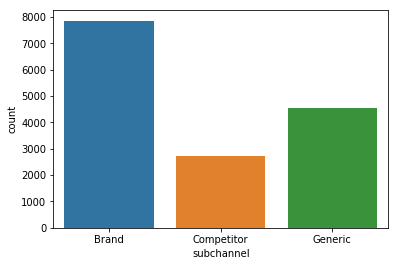

In [24]:
# Countplot
sns.countplot(dfg.subchannel)

##### "device" field

In [26]:
dfg.device.value_counts()

Mobile     7357
Desktop    6318
Tablet     1426
Name: device, dtype: int64

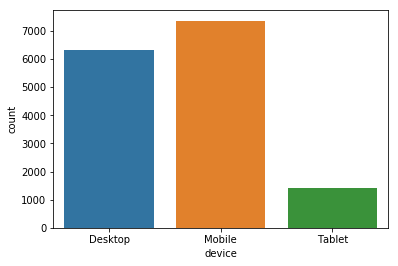

In [27]:
sns.countplot(dfg.device)

##### "age" field

In [28]:
dfg.age.value_counts()

25-34           2609
Undetermined    2586
18-24           2472
35-44           2380
45-54           2022
65 or more      1558
55-64           1474
Name: age, dtype: int64

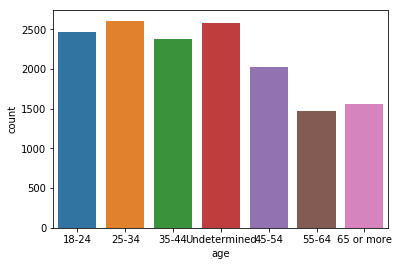

In [29]:
sns.countplot(dfg.age)

##### "impressions" field

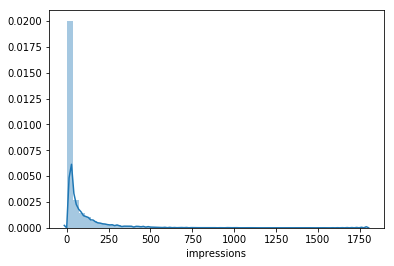

In [30]:
sns.distplot(dfg.impressions)

##### "spends" field

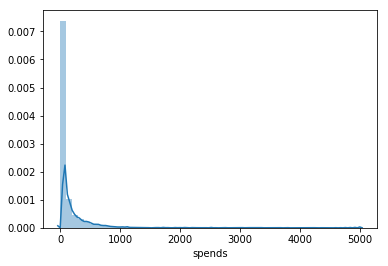

In [31]:
sns.distplot(dfg.spends)

##### "clicks" field

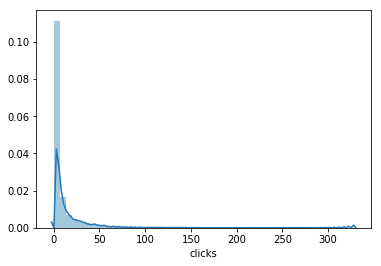

In [32]:
sns.distplot(dfg.clicks)

##### "link_clicks" field

In [34]:
dfg.link_clicks.value_counts()

0.0    15101
Name: link_clicks, dtype: int64

###### all the values in above field are just 0 for this dataset so we would ignore that field from now on.

### Spending of various age groups 

##### 1. 18-24

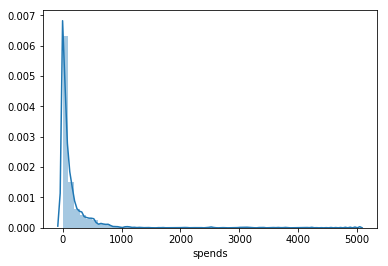

In [35]:
sns.distplot(dfg.loc[dfg.age=="18-24"].spends)

##### 2. 25-34

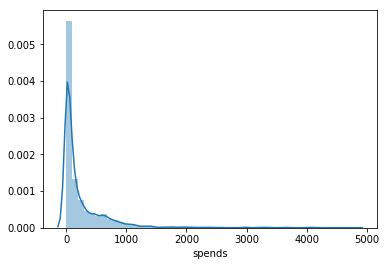

In [36]:
sns.distplot(dfg.loc[dfg.age=="25-34"].spends)

##### 3. 35-44

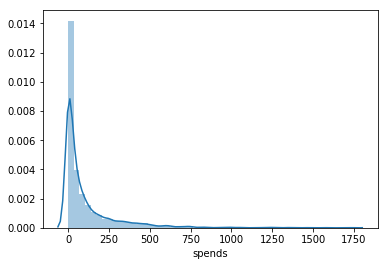

In [42]:
sns.distplot(dfg.loc[dfg.age=="35-44"].spends)

In [43]:
dfg.age.value_counts()

25-34           2609
Undetermined    2586
18-24           2472
35-44           2380
45-54           2022
65 or more      1558
55-64           1474
Name: age, dtype: int64

##### 4. 45-54

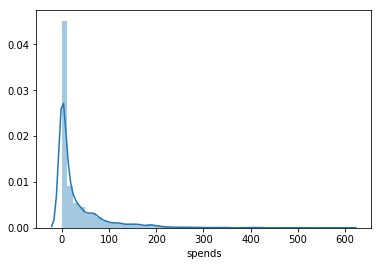

In [44]:
sns.distplot(dfg.loc[dfg.age=="45-54"].spends)

##### 5. 55-64

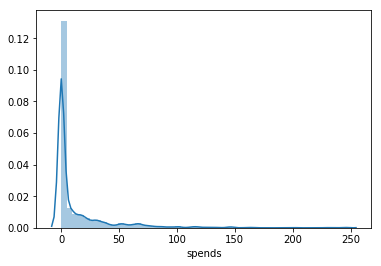

In [45]:
sns.distplot(dfg.loc[dfg.age=="55-64"].spends)

##### 6. 65 or more

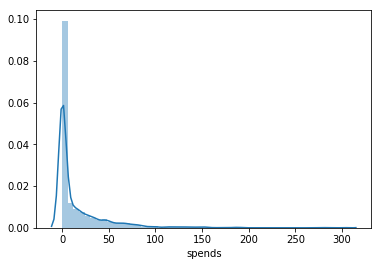

In [46]:
sns.distplot(dfg.loc[dfg.age=="65 or more"].spends)

### Count of various age groups whose spending is more than 1000

In [48]:
dfg.loc[dfg.spends>=1000].age.value_counts()

25-34           142
Undetermined     67
18-24            65
35-44            14
Name: age, dtype: int64

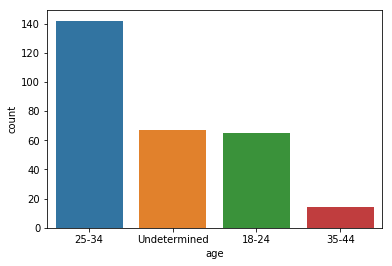

In [49]:
sns.countplot(dfg.loc[dfg.spends>=1000].age)

###### so, the most spending comes from the people whose age is less than 45

### Devices having most no. of clicks 

In [65]:
dfg.loc[dfg.clicks>=0].device.value_counts()

Mobile     7357
Desktop    6318
Tablet     1426
Name: device, dtype: int64

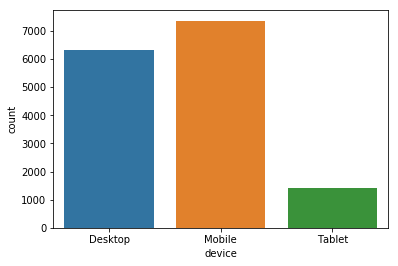

In [66]:
sns.countplot(dfg.loc[dfg.clicks>=0].device)

### Age groups doing most no. of clicks 

In [73]:
dfg.loc[dfg.clicks>1].age.value_counts()

25-34           2000
Undetermined    1705
18-24           1678
35-44           1471
45-54            796
65 or more       404
55-64            329
Name: age, dtype: int64

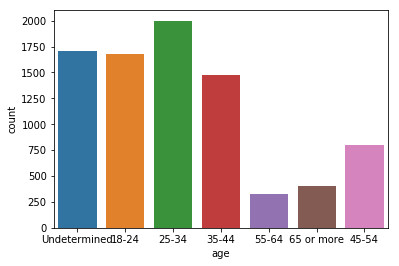

In [72]:
sns.countplot(dfg.loc[dfg.clicks>1].age)

###### so, the most activity is seen from the age group 25-34 age group

### Subchannel used by various age groups

In [75]:
dfg.subchannel.value_counts()

Brand         7853
Generic       4544
Competitor    2704
Name: subchannel, dtype: int64

##### 1. Brand

In [76]:
dfg.loc[dfg.subchannel=="Brand"].age.value_counts()

25-34           1416
Undetermined    1385
18-24           1335
35-44           1268
45-54           1015
65 or more       742
55-64            692
Name: age, dtype: int64

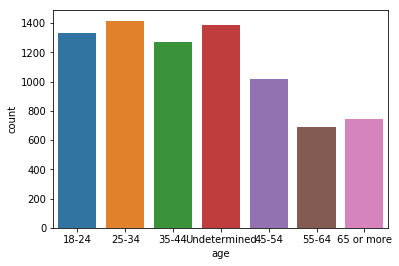

In [77]:
sns.countplot(dfg.loc[dfg.subchannel=="Brand"].age)

##### 2. Generic

In [78]:
dfg.loc[dfg.subchannel=="Generic"].age.value_counts()

Undetermined    746
25-34           737
18-24           705
35-44           681
45-54           634
65 or more      528
55-64           513
Name: age, dtype: int64

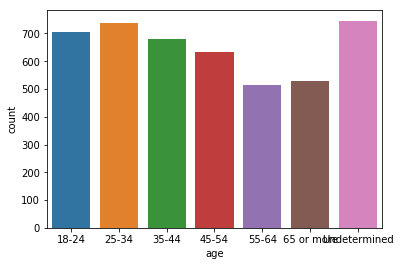

In [79]:
sns.countplot(dfg.loc[dfg.subchannel=="Generic"].age)

##### 3. Competitor

In [81]:
dfg.loc[dfg.subchannel=="Competitor"].age.value_counts()

25-34           456
Undetermined    455
18-24           432
35-44           431
45-54           373
65 or more      288
55-64           269
Name: age, dtype: int64

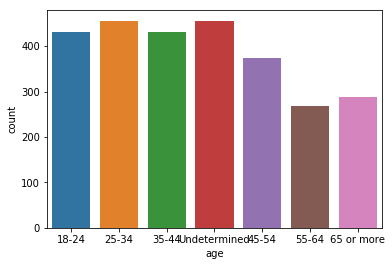

In [82]:
sns.countplot(dfg.loc[dfg.subchannel=="Competitor"].age)

###### So, we can infer that most no. of users of any subchannel come  from the age group 25-34

### Subchannels having most  no.  of clicks

In [83]:
dfg.loc[dfg.clicks>=0].subchannel.value_counts()

Brand         7853
Generic       4544
Competitor    2704
Name: subchannel, dtype: int64

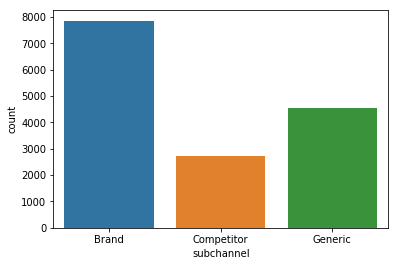

In [84]:
sns.countplot(dfg.loc[dfg.clicks>=0].subchannel)

###### so, most no. of clicks is coming from the subchannel "brand"

#### So, our targets should be focussing on age group 25-34 and using "Brand" subchannel

### Checking the correlation between various fields

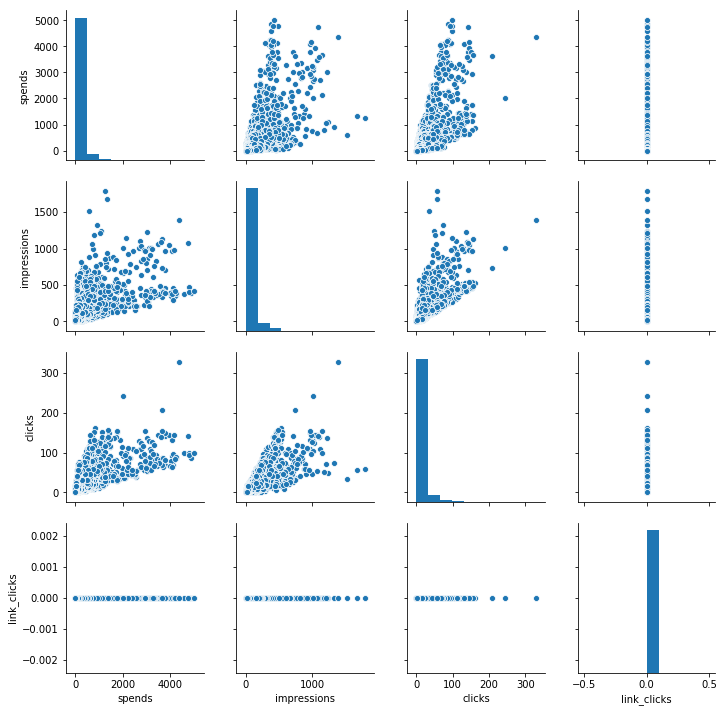

In [111]:
sns.pairplot(dfg)

## "Facebook Ads" DATA EDA

In [85]:
# Finding the columns which have categorical values of more than 1 type

for i in range(2,12):
    if dff.iloc[:,i].nunique()>1:
        print(dfg.columns[i])   

audience_type
creative_type
creative_name
age


#### Handling the missing data 

In [102]:
dff = dff.fillna(0)                  # filling empty spaces in link_clicks field with 0

In [94]:
# Checking for any missing values

x = dff.isna()
flag = 0
for i in x:
    for j in i:
        if not j:
            print("false")
            flag = 1
            break
if flag==0:
    print("true")

true


#### "audience_type" field

In [95]:
dff.audience_type.value_counts()

Audience 1    813
Audience 2    738
Audience 3    182
Name: audience_type, dtype: int64

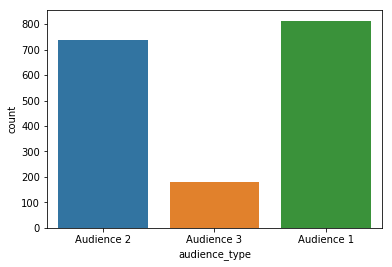

In [96]:
sns.countplot(dff.audience_type)

#### "creative_type" field

In [97]:
dff.creative_type.value_counts()

Image       1130
Carousal     603
Name: creative_type, dtype: int64

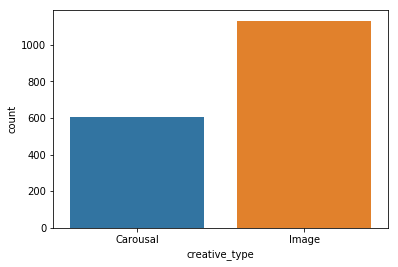

In [98]:
sns.countplot(dff.creative_type)

#### "creative_name" field


In [99]:
dff.creative_name.value_counts()

Click       644
Carousal    603
Girl        486
Name: creative_name, dtype: int64

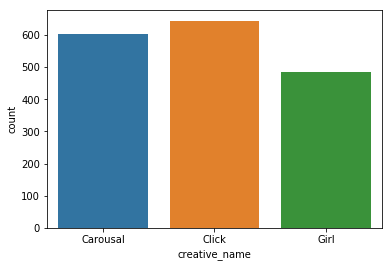

In [100]:
sns.countplot(dff.creative_name)

#### "age" field

In [101]:
dff.age.value_counts()

25-34    488
35-44    485
45-54    477
55-64    283
Name: age, dtype: int64

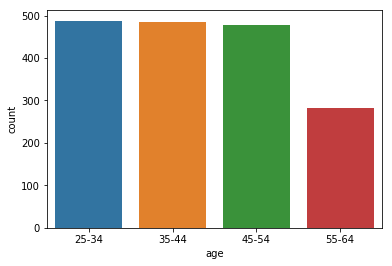

In [103]:
sns.countplot(dff.age)

#### "impressions" field

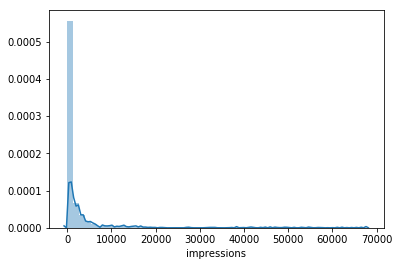

In [104]:
sns.distplot(dff.impressions)

#### "spends" field

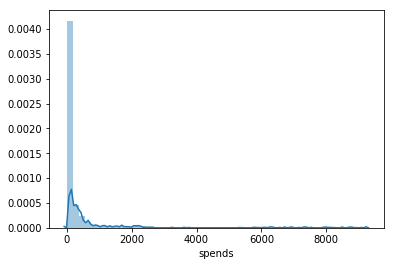

In [105]:
sns.distplot(dff.spends)

#### "clicks" field

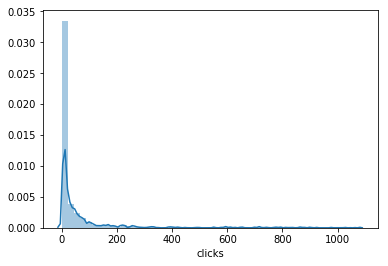

In [106]:
sns.distplot(dff.clicks)

#### "link_clicks" field

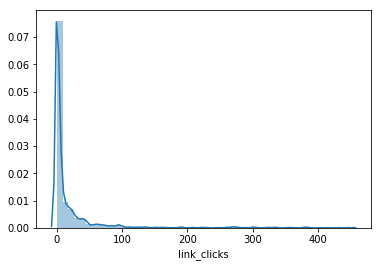

In [110]:
sns.distplot(dff.link_clicks)

### Checking the most no. of clicks according to audience type

In [113]:
dff.audience_type.value_counts()

Audience 1    813
Audience 2    738
Audience 3    182
Name: audience_type, dtype: int64

##### 1. Audience 1

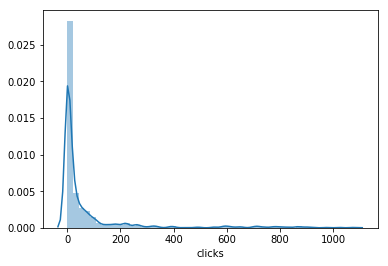

In [114]:
sns.distplot(dff.loc[dff.audience_type=="Audience 1"].clicks)

#### 2. Audience 2

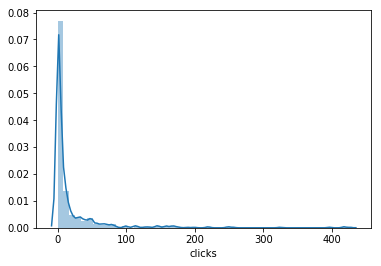

In [117]:
sns.distplot(dff.loc[dff.audience_type=="Audience 2"].clicks)

#### 3. Audience 3

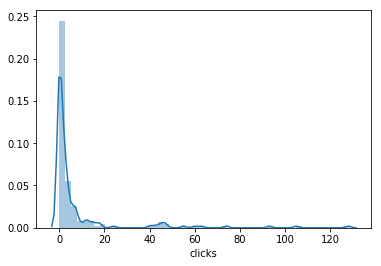

In [119]:
sns.distplot(dff.loc[dff.audience_type=="Audience 3"].clicks)

### No. of clicks by various audiences

In [120]:
dff.loc[dff.clicks>=0].audience_type.value_counts()

Audience 1    813
Audience 2    738
Audience 3    182
Name: audience_type, dtype: int64

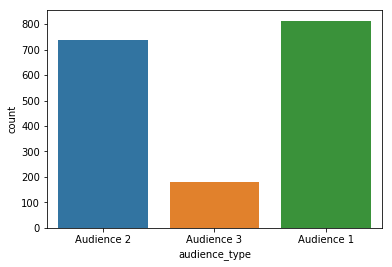

In [121]:
sns.countplot(dff.loc[dff.clicks>=0].audience_type)

### Visualising no. of audiences of each type in various age groups

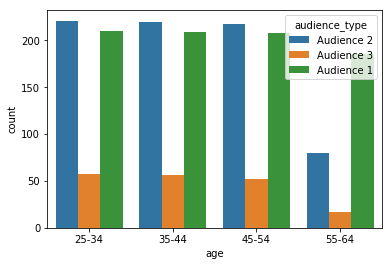

In [122]:
sns.countplot(x=dff.age, hue=dff.audience_type)

### Spending of various audience types

Text(0, 0.5, 'Spending')

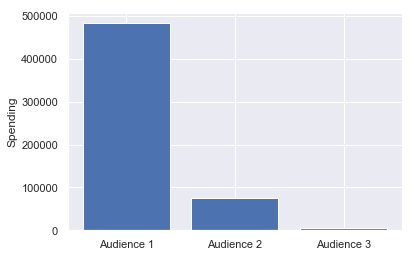

In [128]:
sns.set()
a1 = 0
a2 = 0
a3 = 0
for i in dff.loc[dff.audience_type=="Audience 1"].spends:
    a1+=i
    
for i in dff.loc[dff.audience_type=="Audience 2"].spends:
    a2+=i
    
for i in dff.loc[dff.audience_type=="Audience 3"].spends:
    a3+=i
    
plt.bar(["Audience 1","Audience 2","Audience 3"],[a1,a2,a3])
plt.ylabel("Spending")

###### The audiennce 1 spend the most

### No. of clicks by various audiences 

Text(0, 0.5, 'No. of clicks')

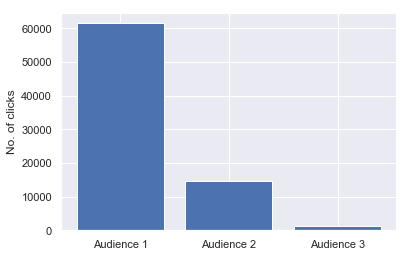

In [129]:
a1 = 0
a2 = 0
a3 = 0
for i in dff.loc[dff.audience_type=="Audience 1"].clicks:
    a1+=i
    
for i in dff.loc[dff.audience_type=="Audience 2"].clicks:
    a2+=i
    
for i in dff.loc[dff.audience_type=="Audience 3"].clicks:
    a3+=i
    
plt.bar(["Audience 1","Audience 2","Audience 3"],[a1,a2,a3])
plt.ylabel("No. of clicks")

###### so, the auidence 1 have most no. of clicks 

### No. of link_clicks by various audiences

Text(0, 0.5, 'No. of link clicks')

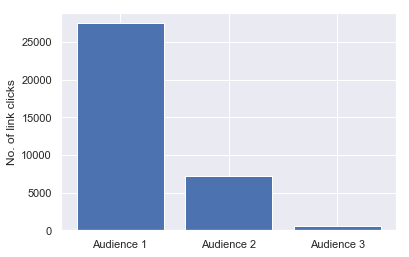

In [130]:
a1 = 0
a2 = 0
a3 = 0
for i in dff.loc[dff.audience_type=="Audience 1"].link_clicks:
    a1+=i
    
for i in dff.loc[dff.audience_type=="Audience 2"].link_clicks:
    a2+=i
    
for i in dff.loc[dff.audience_type=="Audience 3"].link_clicks:
    a3+=i
    
plt.bar(["Audience 1","Audience 2","Audience 3"],[a1,a2,a3])
plt.ylabel("No. of link clicks")

### Spending by various age groups 

Text(0, 0.5, 'Spending')

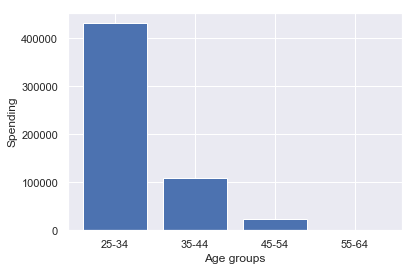

In [134]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for i in dff.loc[dff.age=="25-34"].spends:
    a1+=i
    
for i in dff.loc[dff.age=="35-44"].spends:
    a2+=i
    
for i in dff.loc[dff.age=="45-54"].spends:
    a3+=i
    
for i in dff.loc[dff.age=="55-64"].spends:
    a4+=i
    
plt.bar(["25-34","35-44","45-54","55-64"],[a1,a2,a3,a4])
plt.xlabel("Age groups")
plt.ylabel("Spending")

### No. of clicks by various audiences

Text(0, 0.5, 'No. of Clicks')

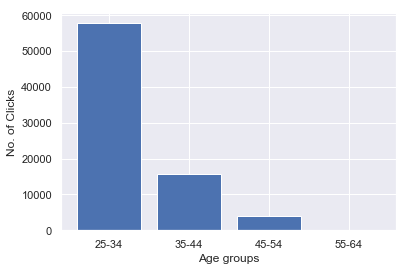

In [135]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for i in dff.loc[dff.age=="25-34"].clicks:
    a1+=i
    
for i in dff.loc[dff.age=="35-44"].clicks:
    a2+=i
    
for i in dff.loc[dff.age=="45-54"].clicks:
    a3+=i
    
for i in dff.loc[dff.age=="55-64"].clicks:
    a4+=i
    
plt.bar(["25-34","35-44","45-54","55-64"],[a1,a2,a3,a4])
plt.xlabel("Age groups")
plt.ylabel("No. of Clicks")

### No. of link clicks by various age groups

Text(0, 0.5, 'No. of link Clicks')

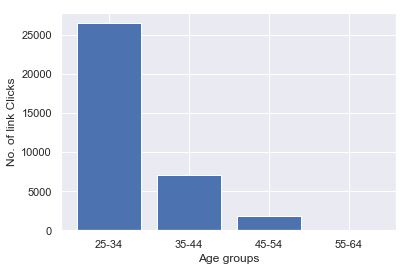

In [137]:
a1 = 0
a2 = 0
a3 = 0
a4 = 0
for i in dff.loc[dff.age=="25-34"].link_clicks:
    a1+=i
    
for i in dff.loc[dff.age=="35-44"].link_clicks:
    a2+=i
    
for i in dff.loc[dff.age=="45-54"].link_clicks:
    a3+=i
    
for i in dff.loc[dff.age=="55-64"].link_clicks:
    a4+=i
    
plt.bar(["25-34","35-44","45-54","55-64"],[a1,a2,a3,a4])
plt.xlabel("Age groups")
plt.ylabel("No. of link Clicks")

### Creative type of age group 25-34

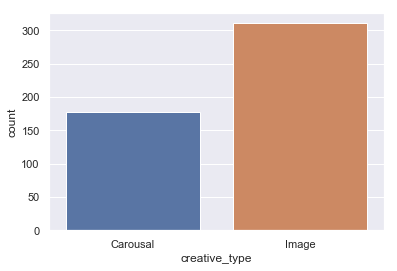

In [139]:
sns.countplot(dff.loc[dff.age=="25-34"].creative_type)

### Creative Name of age group 25-34

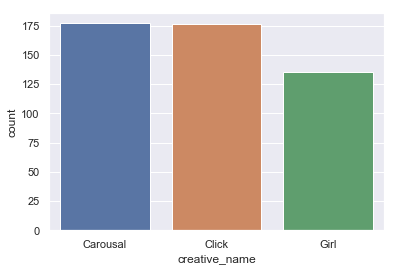

In [140]:
sns.countplot(dff.loc[dff.age=="25-34"].creative_name)

### Creative Type of Audience 1

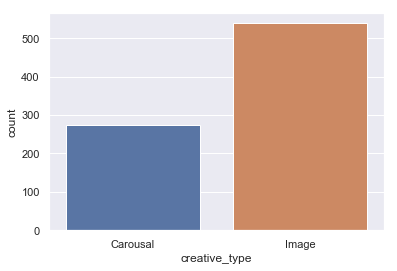

In [141]:
sns.countplot(dff.loc[dff.audience_type=="Audience 1"].creative_type)

### Creative Name of Audience 1

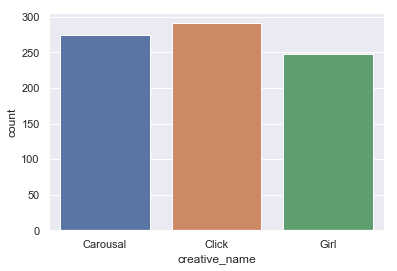

In [142]:
sns.countplot(dff.loc[dff.audience_type=="Audience 1"].creative_name)

In [143]:
dff.loc[dff.link_clicks>1].age.value_counts()

25-34    429
35-44    313
45-54    201
55-64     11
Name: age, dtype: int64

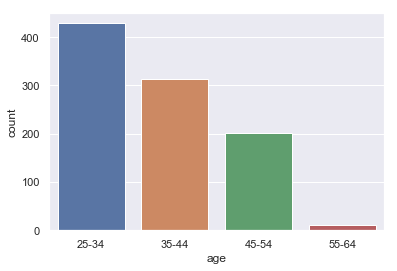

In [144]:
sns.countplot(dff.loc[dff.link_clicks>1].age)

In [145]:
dff.loc[dff.link_clicks>1].audience_type.value_counts()

Audience 1    511
Audience 2    380
Audience 3     63
Name: audience_type, dtype: int64

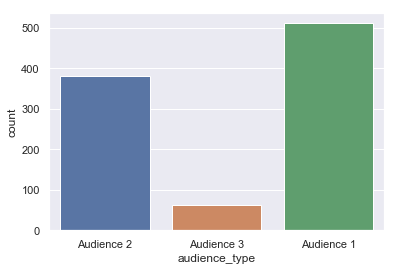

In [146]:
sns.countplot(dff.loc[dff.link_clicks>1].audience_type)

##### So, in the facebook ads data our main targets should be audience 1 or age group 25-34 or both. Also we should be using creative type Image

### Correlation between various fields in afacebook ads data

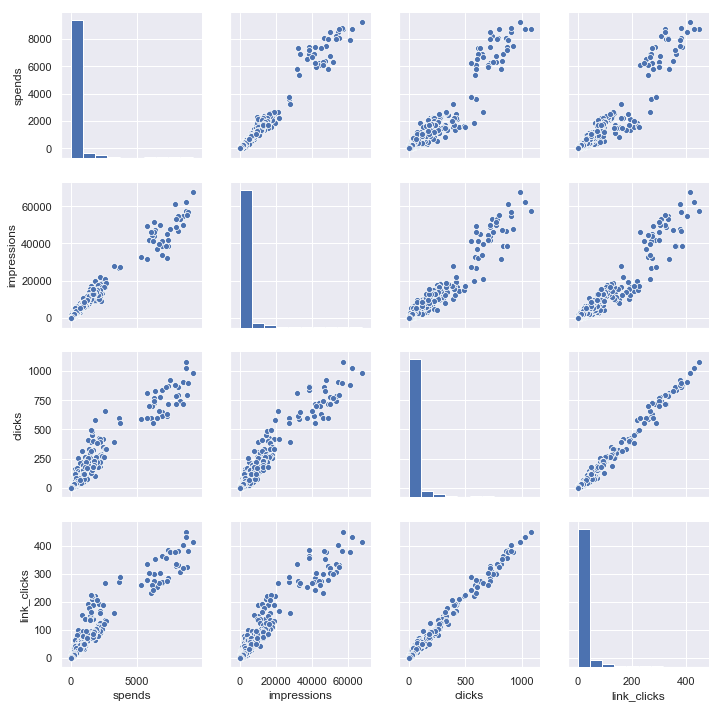

In [147]:
sns.pairplot(dff)

## FINAL CONCLUSION 

##### main focus in google ads data - age group 25-34 and brand subchannel
##### main focus in facebook ads data - age group 25-34 and audience 1